In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 2.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv


# **I am not trying to do same analysis what others are already done. Like best selling book or corr between diff columns.I try to find out something different . Must read my notebook and you will definitely explore something new.**

# **What we have to do?**



*  Top 10 cities with max orders.
*  Visualize order status frequency
*  Payment Method selected by people.
*  Hidden Pattern of returned orders.
*  Is Online Payment or Bank transfer reason of cancellation?
*  Any specific book which is return.

# Loading dataset 

In [89]:
df1 = pd.read_csv('/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv')

df1.head()



,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 10:29,Karachi


In [90]:

df2 = pd.read_csv('/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv')
df2.head()


,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19187 entries, 0 to 19186
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order Number    19187 non-null  int64 
 1   Order Status    19187 non-null  object
 2   Book Name       19185 non-null  object
 3   Order Date      19187 non-null  object
 4   City (Billing)  19186 non-null  object
dtypes: int64(1), object(4)
memory usage: 749.6+ KB


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          19239 non-null  int64  
 1   Order Status          19239 non-null  object 
 2   Book Name             19237 non-null  object 
 3   Order Date & Time     19239 non-null  object 
 4   City                  19238 non-null  object 
 5   Payment Method        19229 non-null  object 
 6   Total items           19239 non-null  int64  
 7   Total weight (grams)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


df2 has more coulmns and I can do analysis more on that.  That's why I am working only on df2.

In [93]:
# finding shape of our dataset

df2.shape

(19239, 8)

It has 8 coulmns and 19239 rows.

In [94]:
df2.describe()

,Order Number,Total items,Total weight (grams)
count,19239.000000,19239.000000,19239.000000
mean,52535.780238,6.051874,363.749675
std,15835.761148,576.938452,834.097325
min,307.000000,0.000000,200.000000
25%,48064.500000,1.000000,200.000000
50%,56436.000000,1.000000,200.000000
75%,63779.500000,1.000000,500.000000
max,71420.000000,80022.000000,55000.000000


# Finding Outlier

In [95]:
df2[df2['Total items'] == 80022]
# df2=df[df['Total items'] !=80022]

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
15981,66499,Returned,انٹرنیٹ سے پیسہ کمائیں,12/27/2020 1:37,City,EasyPaisa,80022,200.0


In [96]:
df2=df2[df2['Total items'] !=80022]

# Handling missing values

In [97]:
df2.isnull().sum()

Order Number             0
Order Status             0
Book Name                2
Order Date & Time        0
City                     1
Payment Method          10
Total items              0
Total weight (grams)     0
dtype: int64

In [98]:
df2.dropna(subset=['Book Name'] , inplace=True)

Drop nan values of book name as it was only 2.

In [99]:
df2[df2['City'].isnull()]      # city that has null value

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
15266,65221,Completed,"Blockchain, Cryptocurrency And Bitcoin/R ka Ta...",12/17/2020 7:18,NaN,BankTransfer,6,500.0


In [100]:
# replace nan city with other

df2['City'].fillna('other' , inplace = True)

In [101]:
# drop nan values of payment method

df2.dropna(subset=['Payment Method'] , inplace=True)

In [102]:
df2.isnull().sum()

Order Number            0
Order Status            0
Book Name               0
Order Date & Time       0
City                    0
Payment Method          0
Total items             0
Total weight (grams)    0
dtype: int64

Now there are no null values.

# Removing Duplicates

In [103]:
df2.duplicated().sum()

0

There are no duplicate values in this data set 

# Cleaning data

In [104]:
df2.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 18:17,FSD,Cash on Delivery (COD),5,200.0


In [105]:
# Rename order number as it had some special characters.

df2 = df2.rename({'ï»¿Order Number':'Order Number'}, axis=1)
df2.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 18:17,FSD,Cash on Delivery (COD),5,200.0


# 1. Cleaning Book Name

In [106]:
#Let's see how many books we have

df2['Book Name'].nunique()

3518

In [107]:
book_names = {'ڈیٹا سائنس' : 'Data Science', 'ڈیٹا سائنس ۔ ایک تعارف': 'Data Science','انٹرنیٹ سے پیسہ کمائیں؟': 'Internet sy paisa kamayen',
           'انٹرنیٹ سے پیسہ کمائیں': 'Internet sy paisa kamayen', 'Masnoi Zahanat': 'Artificial Intelligence',
          'Bit Coin Block Chain aur Crypto Currency': 'Blockchain, Cryptocurrency And Bitcoin', '(C++)': 'C++',
          '(C++) ++': 'C++', '(C++ ) ++': 'C++'}

df2['Book Name'] = df2['Book Name'].replace(book_names)

In [108]:
df2['Book Name'].nunique()

3514

# 2. Cleaning city names

In [109]:
# checking how many unique values in city

df2['City'].nunique()

4164

In [110]:
df2['City'].unique()

array(['Rawalpindi', 'Hyderabad', 'Karachi ', ...,
       'tehsil Bhalwal District Sargodha', 'Clifton / Karachi',
       'Mailsi, district Vehari'], dtype=object)

In [111]:
#changing city name into lower case

df2['City'] = df2['City'].str.lower()

In [112]:
# spelling correction of karachi

print((df2['City'] == 'karach').value_counts())

df2['City'] = df2['City'].replace(['karach'],['karachi'])
#replace them with correct spelling

False    19222
True         4
Name: City, dtype: int64


In [113]:
df2.City.value_counts().index

Index(['karachi', 'lahore', 'islamabad', 'rawalpindi', 'faisalabad',
       'peshawar', 'multan', 'gujranwala', 'hyderabad', 'quetta',
       ...
       'azizabad, khi', 'scheme#33, gulzar-e-hijri karachi', 'pindi said pur',
       'qasimabad hyderabada', 'raiwind 65 chak stop', 'dha lahore',
       'basti machar wala thesil alipur', 'thana bula khan',
       'mandi bhuddin punjab pakistan', 'mailsi, district vehari'],
      dtype='object', length=3598)

In [114]:

# changing short name of cities into 
city_names = {'khi': 'karachi',
                'lhr': 'lahore', 
                'isb': 'islamabad',
                'fsd': 'faisalabad', 
                'hyd': 'hyderabad',
                'dgk': 'dera ghazi khan', 
                'rwp': 'rawalpindi',
                'wah cantt': 'rawalpindi'}
df2['City'] = df2['City'].replace(city_names)



In [115]:

# finding areas of karachi and then replace all with karachi


areas_karachi=df2['City'][df2['City'].str.endswith('karachi')].unique()
areas_karachi

array(['karachi', 'malir, karachi', 'bahria town karachi',
       'district central/karachi', 'saudabad, malir, karachi',
       'east karachi', 'gulzar e hijri ,karachi',
       'abul hasan isphahani road, karachi', 'central/karachi',
       'east/karachi', 'gulberg town/karachi',
       'main nathional highway landhi karachi', 'south/ karachi',
       'karachi east karachi', 'gulistan e johar, karachi',
       'gadap town malir karachi',
       'opposite ridge house, bath island, karachi',
       'gulzarehijri karachi', 'central / karachi',
       'bizerya lines near masjid hawaria behind regent plaza hotel karachi',
       'district central karachi', 'west/karachi', 'sindh/karachi',
       'malir/karachi', 'south/karachi', 'central karachi',
       'east / karachi', 'abul hassan isphani road / karachi',
       'east/ karachi', 'malir canot karachi', 'saddar, karachi',
       'malir karachi', 'central district/karachi',
       'distric malir karachi', 'north karachi, karachi',
      

Soo many different address from karachi.They will not plot properly. So, replace all with their city name only.

In [116]:
# replace all areas of karachi with karachi
df2['City'] = df2['City'].replace(areas_karachi,'karachi')
df2['City']

1                     rawalpindi
2                      hyderabad
3                     rawalpindi
4                       karachi 
5                     faisalabad
                  ...           
19234                     lahore
19235                     lahore
19236                    larkana
19237    mailsi, district vehari
19238                     lahore
Name: City, Length: 19226, dtype: object

In [117]:
# again checking unique values ends with karachi
df2['City'][df2['City'].str.endswith('karachi')].unique()

array(['karachi'], dtype=object)

In [118]:
df2['City'].value_counts()[:10]           # top 10 cities with most selling books

karachi       2939
lahore        2192
islamabad      948
rawalpindi     773
faisalabad     530
peshawar       493
multan         464
gujranwala     278
hyderabad      267
quetta         252
Name: City, dtype: int64

We can more clean city names with same process as we done with karachi.All the areas replace by their city names.

In [119]:
# finding areas of islamabad and then replace all with islamabad


areas_islamabad=df2['City'][df2['City'].str.endswith('islamabad')].unique()
areas_islamabad


array(['islamabad', 'islamabad/ islamabad', 'i-8/4 islamabad',
       'tarnol islamabad', 'e-9 paf paf complex islamabad',
       'islamabad islamabad',
       'bahria enclave weight station chak shahzad islamabad',
       'bhara kahu / islamabad', 'margalla town, islamabad',
       'rawal town, islamabad',
       'street no 13, sector a, dha phase 1, islamabad',
       'chirah islamabad', 'bhara khu / islamabad',
       'bhara kahu islamabad', 'media town, islamabad',
       'h_11 police line headquarters man gate islamabad',
       'koral islamabad', 'bharakahu ,islamabad', 'model town islamabad',
       'bhara kahu/ islamabad', 'sihala islamabad', 'barakao islamabad',
       'jamia masjid zaraj opp giga mall islamabad',
       'dha phase 2 islamabad',
       'burma town,near main lethrar road ,islamabad',
       'soan garden sector c islamabad',
       'phase - 3 , bahria town. islamabad', 'i10/2 islamabad',
       'sector h-8, islamabad', 'i-10/1 islamabad',
       'l-ghousia,milk 

Soo many different address from islamabad.They will not plot properly. So, replace all with their city name only. 

In [120]:
# replace all areas of islamabad with islamabad
df2['City'] = df2['City'].replace(areas_islamabad,'islamabad')
print(df2['City'],"\n\n\n")

# again checking unique values ends with islamabad
df2['City'][df2['City'].str.endswith('islamabad')].unique()

1                     rawalpindi
2                      hyderabad
3                     rawalpindi
4                       karachi 
5                     faisalabad
                  ...           
19234                     lahore
19235                     lahore
19236                    larkana
19237    mailsi, district vehari
19238                     lahore
Name: City, Length: 19226, dtype: object 





array(['islamabad'], dtype=object)

In [121]:
df2['City'].value_counts()[:10]    

karachi       2939
lahore        2192
islamabad     1012
rawalpindi     773
faisalabad     530
peshawar       493
multan         464
gujranwala     278
hyderabad      267
quetta         252
Name: City, dtype: int64

As we observe that when we replace areas with their city names the count of islamabad changes.
We can do it for all cities.

In [122]:
# finding areas of lahore and then replace all with lahore


areas_lahore=df2['City'][df2['City'].str.endswith('lahore')].unique()
areas_lahore


array(['lahore', 'bahria town, lahore', 'punjab / lahore',
       'house 2-d, shane salam road, gulberg iii, lahore',
       'shahdra lahore', 'afzal road, sanda kalan, lahore',
       'raiwind road lahore', 'shalimar town lahore',
       'iqbal avenue phase 3 / lahore', 'bhaikot raiwind lahore',
       'maher town badian road lahore', 'allama iqbal town, lahore',
       'icon valley, raiwind road,lahore', 'township lahore',
       'faisal town lahore', 'eden value homes, main multan road, lahore',
       'mustafa town wahdat road lahore', 'allama iqbal town lahore',
       'mughalpura, lahore', 'overseas-b. bahria town. lahore',
       'hassan town multan road lahore', 'mohlanwal multan road lahore',
       'phase 4 dha, lahore', 'gulshane ravi lahore', 'shadbagh , lahore',
       'rewaz garden, lahore', 'johar town lahore',
       'baidian road , lahore', 'bahria orchard, lahore',
       'bahria town lahore', 'abid rod, islam nagar ,walton, lahore',
       'sabzazar lahore', 'raiwund

In [123]:
# replace all areas of lahore with lahore
df2['City'] = df2['City'].replace(areas_lahore,'lahore')
print(df2['City'],"\n\n\n")

# again checking unique values ends with lahore
df2['City'][df2['City'].str.endswith('lahore')].unique()

1                     rawalpindi
2                      hyderabad
3                     rawalpindi
4                       karachi 
5                     faisalabad
                  ...           
19234                     lahore
19235                     lahore
19236                    larkana
19237    mailsi, district vehari
19238                     lahore
Name: City, Length: 19226, dtype: object 





array(['lahore'], dtype=object)

# **Top 10 cities with max orders.**

In [124]:
top_10cities= df2['City'].value_counts()[:10]  
print(top_10cities)
counts=top_10cities.values
cities=top_10cities.index

karachi       2939
lahore        2343
islamabad     1012
rawalpindi     773
faisalabad     530
peshawar       493
multan         464
gujranwala     278
hyderabad      267
quetta         252
Name: City, dtype: int64


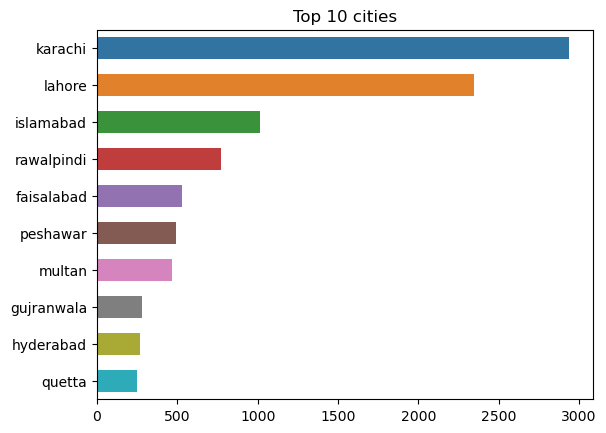

In [125]:
# plot top 10 cities here

city_plot=sns.barplot(x=counts ,y=cities,width =0.6 ,)
plt.title("Top 10 cities")
plt.show()



# **Order status frequency**

In [126]:
# checking order status

order_values = df2['Order Status'].value_counts().index
order_values

Index(['Completed', 'Returned', 'Cancelled'], dtype='object')

In [127]:
order_status =df2['Order Status'].value_counts()
order_status

Completed    17938
Returned      1139
Cancelled      149
Name: Order Status, dtype: int64

<AxesSubplot:xlabel='Order Status', ylabel='count'>

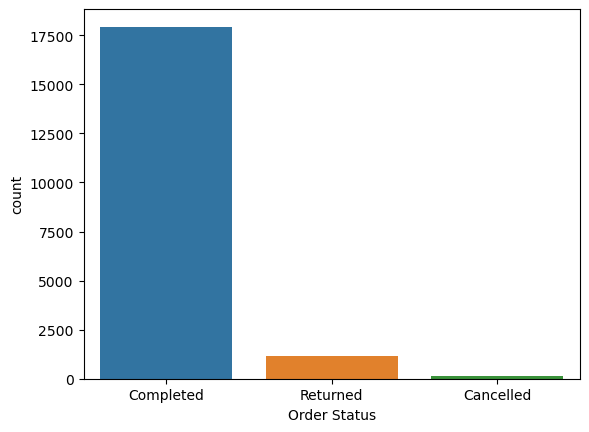

In [128]:
sns.countplot(x ='Order Status',order = order_values, data = df2)

As, we can see that most of the orders are completed. Few of them are returned and minor are cancelled.


([<matplotlib.patches.Wedge at 0x7fb013952b90>,
 [Text(-1.0757275873138992, 0.22980460807350617, 'Completed'),
  Text(1.0698142235418364, -0.25592484660067283, 'Returned'),
  Text(1.099673981979783, -0.026779345711349507, 'Cancelled')],
 [Text(-0.5867605021712177, 0.12534796804009427, '93.30%'),
  Text(0.5835350310228198, -0.13959537087309426, '5.92%'),
  Text(0.5998221719889725, -0.014606915842554274, '0.77%')])

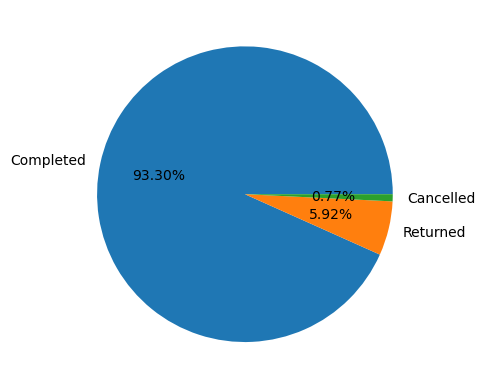

In [129]:
# Order status frequency
plt.pie(order_status, labels = order_values ,autopct = '%1.2f%%')

# **Payment Method selected by people**

In [130]:
df2['Payment Method'].unique()    # checking unique 

df2['Payment Method'] = df2['Payment Method'].replace('Cash on Delivery (COD)','Cash on delivery') # replace
pay_method=df2['Payment Method'].value_counts().index           # checking unique 
pay_method

Index(['Cash on delivery', 'EasyPaisa', 'JazzCash', 'BankTransfer'], dtype='object')

In [131]:
# order_cancel=df2[df2['Order Status'] == 'Cancelled']
# order_cancel
# (order_cancel['Payment Method'] == 'JazzCash').value_counts()

pay_method_values= (df2['Payment Method']).value_counts()
pay_method_values

Cash on delivery    17477
EasyPaisa             695
JazzCash              596
BankTransfer          458
Name: Payment Method, dtype: int64

,Payment Method
Cash on delivery,17477
EasyPaisa,695
JazzCash,596
BankTransfer,458


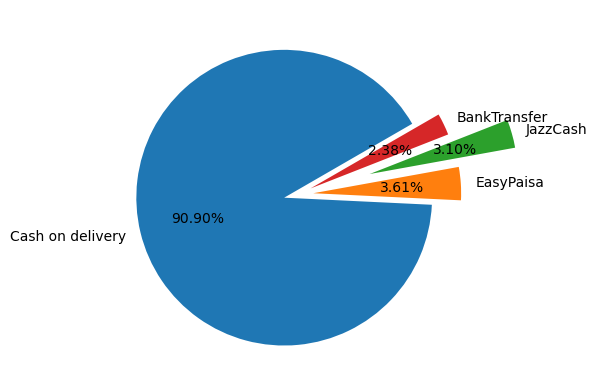

In [132]:
explode = (0.1,0.1,0.5,0.09)
plt.pie(pay_method_values , labels = pay_method ,autopct = '%1.2f%%' , explode = explode,startangle=30,pctdistance=0.6)

pay_method_values.to_frame().style.bar()

People usually prefer Cash on Delivery payment method.

In [133]:
# order_cancel=df2[df2['Order Status'] == 'Cancelled']
# order_cancel['Payment Method'].unique()
# (order_cancel['Payment Method'] == 'JazzCash').value_counts()

# **Hidden Pattern of returned orders.**

In [134]:
# book ordered greater than 100 units

above_100books=df2[df2['Total items'] > 99]
above_100books

#books ordered above than 100 units are mostly returned.



,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
8737,55170,Returned,"Blockchain, Cryptocurrency And Bitcoin",9/18/2020 10:55,hub city,EasyPaisa,101,55000.0
8862,55381,Completed,Tarzan or Deo Shahzada/Tarzan or Pariyon ka Ja...,9/20/2020 0:31,islamabad,BankTransfer,194,200.0
12261,60238,Returned,Internet sy paisa kamayen,11/12/2020 1:12,nawab shah,JazzCash,369,200.0
14046,63087,Returned,انٹرنیٹ سے پیسہ کمائیں/Breakthrough by Dr Jami...,11/29/2020 16:19,tuqtta,Cash on delivery,440,200.0
14260,63549,Returned,"Blockchain, Cryptocurrency And Bitcoin",12/2/2020 18:26,waziristan agency,BankTransfer,150,7500.0
16001,66525,Returned,Internet sy paisa kamayen,12/27/2020 9:38,haifzabad,EasyPaisa,280,200.0
16857,67663,Returned,اجالوں کا سفر/Dasht e Wafa/Python Programming/...,1/2/2021 13:02,lahore,BankTransfer,100,36500.0
16861,67667,Returned,اجالوں کا سفر/Dasht e Wafa/Python Programming/...,1/2/2021 13:21,lahore,JazzCash,106,35600.0
16862,67668,Returned,اجالوں کا سفر/Dasht e Wafa/Python Programming/...,1/2/2021 13:22,lahore,JazzCash,106,34500.0
16863,67669,Completed,اجالوں کا سفر/Dasht e Wafa/Python Programming/...,1/2/2021 13:22,lahore,JazzCash,106,33800.0


# Observation

Order above than 100 books are mostly returned.We can fix the limit on items order at a time to avoid returns in future.

In [135]:
above_100=df2['Total items']>99

return_reason =df2[df2['Total items']>99].groupby('Order Status').size().reset_index().rename(columns={0:'Counts'})
return_reason

,Order Status,Counts
0,Completed,2
1,Returned,8


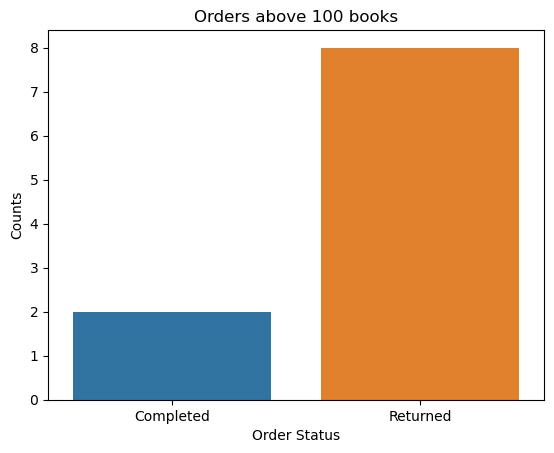

In [136]:
sns.barplot(x='Order Status' , y = 'Counts'  , data = return_reason)
plt.title("Orders above 100 books")
plt.show()

# **Suggestion**

So, we notice that 80% of the orders that are above than 100 items at a time are returned.
To avoid returns , we can fix the limit of itmes ordered at a time.

# **Finding any specific book which is on returned.**

# **Checking books which are completed returned and cancelled**

In [148]:
df2[df2['Order Status'] == 'Returned']['Book Name'].value_counts()

Internet sy paisa kamayen                                                                                   389
Python Programming                                                                                          104
Blockchain, Cryptocurrency And Bitcoin                                                                       89
Artificial Intelligence                                                                                      29
Python Programming- Release Date: August 14, 2020                                                            26
                                                                                                           ... 
Shaoor                                                                                                        1
Armis Prohit/Adhoray Gunnah/Birth Stone/Kaghazi Qayamat/Black Feeder/JSP/KJB Headquarter/Muslim Currency      1
انٹرنیٹ سے پیسہ کمائیں/ڈیٹا سائنس/Justju ka safar-1                                                     

In [140]:
df2[df2['Order Status'] == 'Completed']['Book Name'].value_counts()

Internet sy paisa kamayen                                                                                                                                  2187
Python Programming                                                                                                                                         1436
Product Management                                                                                                                                         1009
Blockchain, Cryptocurrency And Bitcoin                                                                                                                      970
Artificial Intelligence                                                                                                                                     883
                                                                                                                                                           ... 
Black Hills/Black Head/Black Hawk/Black 

In [141]:
df2[df2['Order Status'] == 'Cancelled']['Book Name'].value_counts()

Blockchain, Cryptocurrency And Bitcoin                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                22
Product Management                                                                                                                                                                                                                                                                                                                                                                                                                                             

**Did not find any specific book or pattern.**

# **Trying to find out cancellation reason.**

In [142]:
# order cancelled payment method
df2[df2['Order Status'] == 'Cancelled']['Payment Method'].value_counts()

Cash on delivery    52
EasyPaisa           44
JazzCash            34
BankTransfer        19
Name: Payment Method, dtype: int64

In [143]:
#lets merge all online payment to adv payment 
cancelled_orders = df2[df2['Order Status'] == 'Cancelled']
cancelled_orders

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,rawalpindi,Cash on delivery,1,200.0
28,3593,Cancelled,Bit Coin Block Chain aur Crypto Currency بٹ کو...,11/19/2019 22:55,riyadh,Cash on delivery,1,200.0
46,4275,Cancelled,Kamyab Log,12/5/2019 0:15,muridke sheikhupura,Cash on delivery,1,200.0
80,5062,Cancelled,Data Science,12/20/2019 19:52,faisalabad,Cash on delivery,1,600.0
107,5126,Cancelled,Data Science,12/20/2019 20:43,seri iskander,Cash on delivery,1,600.0
...,...,...,...,...,...,...,...,...
19161,70933,Cancelled,Artificial Intelligence/Python Programming/Blo...,1/19/2021 12:38,gagoo mandi tehsil burewala district vehari,EasyPaisa,9,500.0
19162,70934,Cancelled,Internet sy paisa kamayen,1/19/2021 13:21,karachi,JazzCash,1,200.0
19181,70962,Cancelled,Internet sy paisa kamayen,1/20/2021 13:37,karachi,EasyPaisa,1,200.0
19185,70994,Cancelled,Artificial Intelligence/Kaggle for Begginers/ڈ...,1/20/2021 20:31,multan,BankTransfer,3,400.0


In [149]:
#Now replace all online payments with adv payment

cancelled_orders['Payment Method']=cancelled_orders['Payment Method'].replace({'EasyPaisa':'Adv payment' , 'JazzCash':'Adv payment' , 'BankTransfer':'Adv payment' })
cancelled_orders

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,rawalpindi,Cash on delivery,1,200.0
28,3593,Cancelled,Bit Coin Block Chain aur Crypto Currency بٹ کو...,11/19/2019 22:55,riyadh,Cash on delivery,1,200.0
46,4275,Cancelled,Kamyab Log,12/5/2019 0:15,muridke sheikhupura,Cash on delivery,1,200.0
80,5062,Cancelled,Data Science,12/20/2019 19:52,faisalabad,Cash on delivery,1,600.0
107,5126,Cancelled,Data Science,12/20/2019 20:43,seri iskander,Cash on delivery,1,600.0
...,...,...,...,...,...,...,...,...
19161,70933,Cancelled,Artificial Intelligence/Python Programming/Blo...,1/19/2021 12:38,gagoo mandi tehsil burewala district vehari,Adv payment,9,500.0
19162,70934,Cancelled,Internet sy paisa kamayen,1/19/2021 13:21,karachi,Adv payment,1,200.0
19181,70962,Cancelled,Internet sy paisa kamayen,1/20/2021 13:37,karachi,Adv payment,1,200.0
19185,70994,Cancelled,Artificial Intelligence/Kaggle for Begginers/ڈ...,1/20/2021 20:31,multan,Adv payment,3,400.0


In [145]:
payment_method_values=cancelled_orders['Payment Method'].value_counts().index
payment_method_values

Index(['Adv payment', 'Cash on delivery'], dtype='object')

In [146]:
payment_method=cancelled_orders['Payment Method'].value_counts()
payment_method

Adv payment         97
Cash on delivery    52
Name: Payment Method, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb0139d9610>,
 [Text(-0.5024867702071998, 0.9785228897510456, 'Adv payment'),
  Text(0.5024867702071992, -0.9785228897510458, 'Cash on delivery')],
 [Text(-0.2740836928402907, 0.5337397580460248, '65.10%'),
  Text(0.27408369284029044, -0.5337397580460249, '34.90%')])

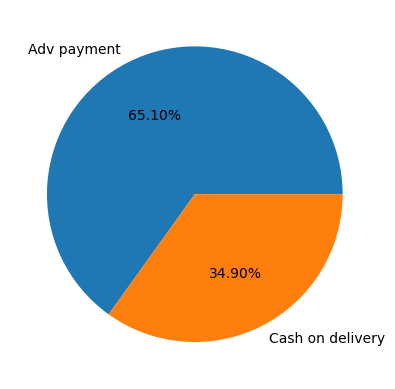

In [147]:
plt.pie(payment_method ,labels =payment_method_values, autopct = '%1.2f%%')

* Adv payment ratio is higher than cash on delivery in cancelled orders.
* May be order cancellation reason is any kind of adv payment.
* Customer change his mind due to payment method.

# **Analysis report**

1. Top 10 cities with most number of orders.
2. 93% orders are Completed  , 5.92% are Returned and 0.77% are Cancelled.
3. People usually prefer Cash on Delivery payment method.
4. Order above than 100 books are mostly returned.
5. We notice that 80% of the orders that are above than 100 items at a time are returned. 
6. To avoid returns , we can fix the limit of itmes ordered at a time.
7. Advance payment(bank transfer, easy paisa , jazz cash) maybe the reason of cancellation of orders.

**Hope so , you find my notebook helpfull.**